In [1]:
using QuantumOptics
using PyPlot
using LinearAlgebra

In [2]:
# Parameters
N_cutoff=10 #photon cutoff
N_atoms=6 #number of atoms
γ=1.0     #decay rate
Δ=0     #detuning
g=10γ    #coupling to the cavity
R=9γ    #pump rate
κ=40γ;    #rate of loss of photons from the cavity

In [3]:
# Bases
b_fock=FockBasis(N_cutoff) 
b_spin=SpinBasis(N_atoms//2)

# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)     

sm = sigmam(b_spin)   
sp = sigmap(b_spin)    
sz = sigmaz(b_spin)

Operator(dim=7x7)
  basis: Spin(3)
 6.0 + 0.0im       ⋅            ⋅       …        ⋅             ⋅     
      ⋅       4.0 + 0.0im       ⋅                ⋅             ⋅     
      ⋅            ⋅       2.0 + 0.0im           ⋅             ⋅     
      ⋅            ⋅            ⋅                ⋅             ⋅     
      ⋅            ⋅            ⋅                ⋅             ⋅     
      ⋅            ⋅            ⋅       …  -4.0 + 0.0im        ⋅     
      ⋅            ⋅            ⋅                ⋅       -6.0 + 0.0im

In [4]:
# Jaynes-Cummings-Hamiltonian
H0 = Δ*n
Hint = g*(at ⊗ sm + a ⊗ sp)
H = H0 ⊗ sparse(one(b_spin)) + Hint;  

In [5]:
# Initial state
Ψ0 = fockstate(b_fock, 0) ⊗ spindown(b_spin)

# Time interval
T_end=1
dt=0.01
T = [0:dt:T_end;]

# Collapse operators and decay rates
J=[sparse(one(b_fock)) ⊗ sm, sparse(one(b_fock)) ⊗ sp, a ⊗ sparse(one(b_spin))]
rates = [γ, R, κ]

# Time evolution according to a master equation
tout, ρt = timeevolution.master(T, Ψ0, H, J; rates=rates)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0], Operator{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{3//1, Int64}}}, CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{3//1, Int64}}}, Matrix{ComplexF64}}[Operator(dim=77x77)
  basis: [Fock(cutoff=10) ⊗ Spin(3)]
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0i

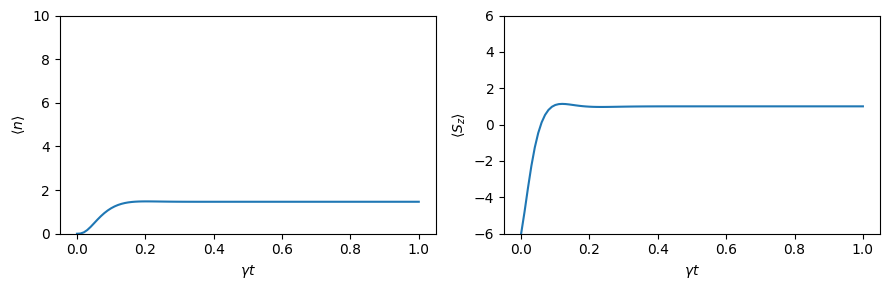

In [9]:
# Photon number and inversion
exp_n_master= real(expect(n ⊗ sparse(one(b_spin)), ρt))
exp_sz_master = real(expect(sparse(one(b_fock)) ⊗ sz, ρt));

# Plot results
figure(figsize=(9, 3))
subplot(121)
ylim([0, N_cutoff])
plot(T, exp_n_master);
xlabel(L"\gamma t")
ylabel(L"\langle n \rangle")

subplot(122)
ylim([-N_atoms, N_atoms])
plot(T, exp_sz_master);
xlabel(L"\gamma t")
ylabel(L"\langle S_z \rangle")

tight_layout()

pygui(false); gcf()

In [8]:
# Photon number distribution
figure(figsize=(9,3))
ρ_end=ptrace(ρt[end], 2)
N=[0:1:N_cutoff;]
p_n=real(diag(ρ_end.data))
bar(N, p_n, label="photon number distribution")
legend()
xlabel("n")
ylabel(L"P(n)")

PyObject Text(0, 0.5, '$P(n)$')